In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [2]:
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    
    for r, row in zip(np.arange(nrows), axes):
        for c, ax in zip(np.arange(ncols), row):
            nth=r*ncols+c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

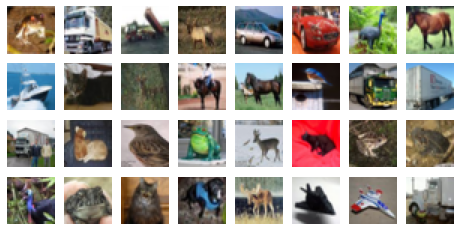

In [5]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

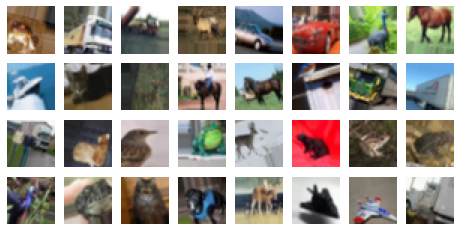

In [6]:
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

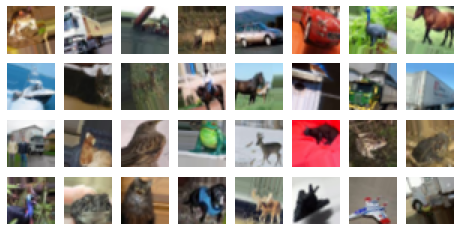

In [7]:
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

In [8]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam

batch_size = 128
num_classes = 10
epochs = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

data_gen = data_generator.flow(x_train, y_train, batch_size=batch_size)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.adadelta(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [10]:
history = model.fit_generator(data_gen,
                    steps_per_epoch=500,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
500/500 [==============================] - 28s 56ms/step - loss: 1.9698 - accuracy: 0.2756 - val_loss: 1.7485 - val_accuracy: 0.3803
Epoch 2/10
500/500 [==============================] - 26s 53ms/step - loss: 1.6337 - accuracy: 0.4008 - val_loss: 1.3247 - val_accuracy: 0.5259
Epoch 3/10
500/500 [==============================] - 27s 53ms/step - loss: 1.4694 - accuracy: 0.4698 - val_loss: 1.2937 - val_accuracy: 0.5388
Epoch 4/10
500/500 [==============================] - 26s 53ms/step - loss: 1.3621 - accuracy: 0.5099 - val_loss: 1.2539 - val_accuracy: 0.5489
Epoch 5/10
500/500 [==============================] - 26s 52ms/step - loss: 1.2809 - accuracy: 0.5433 - val_loss: 1.0184 - val_accuracy: 0.6405
Epoch 6/10
500/500 [==============================] - 27s 53ms/step - loss: 1.2161 - accuracy: 0.5669 - val_loss: 1.1935 - val_accuracy: 0.5754
Epoch 7/10
500/500 [==============================] - 26s 53ms/step - loss: 1.1583 - accuracy: 0.5897 - val_loss: 0.9759 - val_accuracy:

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.967210960483551
Test accuracy: 0.667900025844574
